In [5]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [6]:
"""
File reading
"""
path = '/Users/carlogattuso/Desktop/TFG/Google - Orientacion vertical' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col = None, sep = ",", header = None)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [7]:
"""
Two states model: Least Squares
m1 --> first slope
n1 --> first ordinate
m2 --> second slope
n2 --> second ordinate
x --> data
"""
def two_lin(x, m1, n1, m2, n2):
    return np.min([m1 * x + n1, m2 * x + n2], axis = 0)

In [8]:
"""
Array definition and curve fitting
"""
real_distance = np.array(frame.loc[:, 1])
estimated_distance = np.array(frame.loc[:, 2])
#x = np.array([0, 1, 2,  3,  4,  5,  6,  7,  8,  9,  10])
#y = np.array([2, 4, 8, 12, 14, 18, 20, 21, 22, 23,  24])

"""
Initial values
"""
start_values = [3, 0, 0, 10]
fit_param, pcov = curve_fit(two_lin, real_distance, estimated_distance, p0 = start_values)

In [9]:
"""
Output values for slopes/ordinates
"""
m1, n1, m2, n2 = fit_param
print("Values: ", m1, n1, m2, n2)

Values:  1.6260619505325347 -3.0670180013313364 0.9789604129755792 -0.33674919534231956


In [11]:
"""
Sum of squared residuals to evaluate fitting quality
"""
r = estimated_distance - two_lin(real_distance, *fit_param)
print("Fit quality:", np.sum(np.square(r)))

Fit quality: 9713.920437410678


In [12]:
"""
Interception point between two lines
"""
if m1 != m2:
    x_intersect = (n2 - n1) / (m1 - m2)
    print(x_intersect)
else:
    print("did not find two linear components")

4.219227814380999


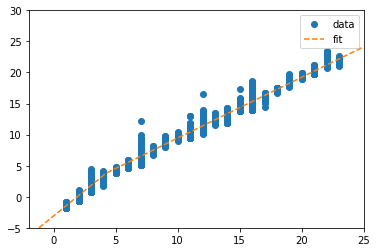

In [14]:
"""
Final plot
"""
x_fit = np.linspace(-10, 25, 100)  
plt.plot(real_distance, estimated_distance, 'o', label='data')
plt.plot(x_fit, two_lin(x_fit, *fit_param), '--', label='fit')

plt.axis([-2, 25, -5, 30])
plt.legend()
plt.show()

In [15]:
"""
Test samples to estimate average RTT distance
"""

test = two_lin(np.array([1, 1.5, 2.35, 5.75, 10.2, 14.7, 23.1]), *fit_param)
print(test)

[-1.44095605 -0.62792508  0.75422758  5.29227318  9.64864702 14.05396888
 22.27723634]
